### Initializations & Data Download

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import warnings
from astropy.io import fits

warnings.filterwarnings("ignore")

C:\Users\Carte\AppData\Local\Temp\ipykernel_18148\1793115621.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# loading in the raw photometric data from 3D-HST
rawdatafile = open('photo_data_with_filter_nan.pkl', 'rb')
rawdata = pickle.load(rawdatafile)

# close the file
rawdatafile.close()

### Looking at Data

In [3]:
# Listing all available photometric filters
rawdata.iloc[0]['filter_name']

['CFHT_U',
 'CFHT_G',
 'CFHT_R',
 'CFHT_I',
 'CFHT_Z',
 'SUBARU_B',
 'SUBARU_g',
 'SUBARU_R',
 'SUBARU_V',
 'SUBARU_z',
 'ACS_F606W',
 'ACS_F814W',
 'WFC3_F125W',
 'WFC3_F160W',
 'UltraVISTA_Y',
 'UltraVISTA_J',
 'UltraVISTA_H',
 'UltraVISTA_Ks',
 'IRAC_CH1',
 'IRAC_CH2',
 'IRAC_CH3',
 'IRAC_CH4',
 'NEWFIRM_J1',
 'NEWFIRM_J2',
 'NEWFIRM_J3',
 'NEWFIRM_H1',
 'NEWFIRM_H2',
 'NEWFIRM_K',
 'Subaru_NB_427',
 'Subaru_NB_464',
 'Subaru_NB_484',
 'Subaru_NB_505',
 'Subaru_NB_527',
 'Subaru_NB_574',
 'Subaru_NB_624',
 'Subaru_NB_679',
 'Subaru_NB_709',
 'Subaru_NB_711',
 'Subaru_NB_738',
 'Subaru_NB_767',
 'Subaru_NB_816',
 'Subaru_NB_827',
 'WFC3_F140W',
 'WIRCAM_J',
 'WIRCAM_H',
 'WIRCAM_K',
 'KPNO_U',
 'LBC_U',
 'ACS_F435W',
 'ACS_F775W',
 'ACS_F850LP',
 'WFC3_F105W',
 'MOIRCS_K',
 'CFHT_Ks',
 'WFC3_F275W',
 'CTIO_U',
 'VIMOS_U',
 'WFC3_F098M',
 'ISAAC_Ks',
 'HAWKI_Ks',
 'SUBARU_i',
 'HAWKI_Y',
 'UKIDSSDR8_J',
 'UKIDSSDR8_H',
 'UKIDSSDR8_K']

In [4]:
# Defining lists of filter names we want to use
filternames = ['cfht.megacam.u', 'cfht.megacam.g', 'cfht.megacam.r', 'cfht.megacam.inew', 'cfht.megacam.z',
               'subaru_B', 'SUBARU_g', 'SUBARU_r', 'SUBARU_V', 'SUBARU_z',
               'ACS_F606W', 'ACS_F814W', 'hst.wfc3.F125W', 'hst.wfc3.F160W',
               'vista.vircam.Y', 'vista.vircam.J', 'vista.vircam.H', 'vista.vircam.Ks',
               'spitzer.irac.ch1', 'spitzer.irac.ch2', 'spitzer.irac.ch3', 'spitzer.irac.ch4',
               'NEWFIRM_J1', 'NEWFIRM_J2', 'NEWFIRM_J3', 'NEWFIRM_H1', 'NEWFIRM_H2', 'NEWFIRM_K',
               'subaru.suprime.IB427', 'subaru.suprime.IB464', 'subaru.suprime.IB484', 'subaru.suprime.IB505', 'subaru.suprime.IB527', 'subaru.suprime.IB574', 'subaru.suprime.IB624',
               'subaru.suprime.IB679', 'subaru.suprime.IB709', 'subaru.suprime.NB711', 'subaru.suprime.IB738', 'subaru.suprime.IB767', 'subaru.suprime.NB816', 'subaru.suprime.IB827',
               'hst.wfc3.F140W',
               'cfht.wircam.J', 'cfht.wircam.H', 'cfht.wircam.K',
               'KPNOU', 'LBC_U', 'ACS_F435W', 'ACS_F775W', 'ACS_F850LP', 'WFC3_F105W', 'MOIRCS_K', 'cfht.wircam.Ks',
               'WFC3_F275W', 'CTIO_MosaicII.U', 'VIMOS_U', 'WFC3_F098M',
               'ISAACKS', 'HAWKI_Ks', 'SUBARU_i',
               'HAWKI_Y', 'ukirt.J', 'ukirt.H', 'ukirt.Ks']

cigalefilternames = ['cfht.megacam.u', 'cfht.megacam.g', 'cfht.megacam.r', 'cfht.megacam.inew', 'cfht.megacam.z',
               'subaru_B', 'SUBARU_g', 'SUBARU_r', 'SUBARU_V', 'SUBARU_z',
               '', '', 'hst.wfc3.F125W', 'hst.wfc3.F160W',
               'vista.vircam.Y', 'vista.vircam.J', 'vista.vircam.H', 'vista.vircam.Ks',
               'spitzer.irac.ch1', 'spitzer.irac.ch2', 'spitzer.irac.ch3', 'spitzer.irac.ch4',
               '', '', '', '', '', '',
               'subaru.suprime.IB427', 'subaru.suprime.IB464', 'subaru.suprime.IB484', 'subaru.suprime.IB505', 'subaru.suprime.IB527', 'subaru.suprime.IB574', 'subaru.suprime.IB624',
               'subaru.suprime.IB679', 'subaru.suprime.IB709', 'subaru.suprime.NB711', 'subaru.suprime.IB738', 'subaru.suprime.IB767', 'subaru.suprime.NB816', 'subaru.suprime.IB827',
               'hst.wfc3.F140W',
               'cfht.wircam.J', 'cfht.wircam.H', '',
               'KPNOU', '', '', '', '', '', '', 'cfht.wircam.Ks',
               '', 'CTIO_MosaicII.U', '', '',
               'ISAACKS', '', 'SUBARU_i',
               '', 'ukirt.J', 'ukirt.H', 'ukirt.Ks']

In [5]:
# Creating blank dataframe with all columns for CIGALE input defined
cigaledata = pd.DataFrame(np.empty((len(rawdata), 53)), columns=['id', 'redshift',
                                   'cfht.megacam.u', 'cfht.megacam.g', 'cfht.megacam.r', 'cfht.megacam.inew', 'cfht.megacam.z',
                                   'subaru_B', 'SUBARU_V', 'SUBARU_r', 'SUBARU_i', 'SUBARU_z', 'SUBARU_g',
                                   'hst.wfc3.F125W', 'hst.wfc3.F140W', 'hst.wfc3.F160W',
                                   'vista.vircam.Y', 'vista.vircam.J', 'vista.vircam.H', 'vista.vircam.Ks',
                                   'spitzer.irac.ch1', 'spitzer.irac.ch2', 'spitzer.irac.ch3', 'spitzer.irac.ch4',
                                   'noao.J1', 'noao.J2', 'noao.J3', 'noao.H1', 'noao.H2', 'noao.Ks',
                                   'subaru.suprime.IB427', 'subaru.suprime.IB464', 'subaru.suprime.IB484', 'subaru.suprime.IB505', 'subaru.suprime.IB527', 'subaru.suprime.IB574', 'subaru.suprime.IB624',
                                   'subaru.suprime.IB679', 'subaru.suprime.IB709', 'subaru.suprime.NB711', 'subaru.suprime.IB738', 'subaru.suprime.IB767', 'subaru.suprime.NB816', 'subaru.suprime.IB827',
                                   'cfht.wircam.J', 'cfht.wircam.H', 'cfht.wircam.Ks',
                                   'KPNOU',
                                   'CTIO_MosaicII.U',
                                   'ISAACKS',
                                   'ukirt.J', 'ukirt.H', 'ukirt.Ks'])
cigaledata

,id,redshift,cfht.megacam.u,cfht.megacam.g,cfht.megacam.r,cfht.megacam.inew,cfht.megacam.z,subaru_B,SUBARU_V,SUBARU_r,...,subaru.suprime.IB827,cfht.wircam.J,cfht.wircam.H,cfht.wircam.Ks,KPNOU,CTIO_MosaicII.U,ISAACKS,ukirt.J,ukirt.H,ukirt.Ks
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5968,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5969,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5970,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5971,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# Displaying the rawdata to determine how to grab information out of it
rawdata

,RA,DEC,zspec,separation,spec_idx,wavelength,flux,filter_name
0,150.105836,2.184445,1.21,0.006329,1255,"[3823.29, 4877.37, 6230.62, 7617.66, 8827.98, ...","[0.00958961, 0.038475, 0.0666988, 0.256746, 0....","[CFHT_U, CFHT_G, CFHT_R, CFHT_I, CFHT_Z, SUBAR..."
1,150.107397,2.186468,0.57,0.023773,1256,"[3823.29, 4877.37, 6230.62, 7617.66, 8827.98, ...","[0.613491, 0.795136, 1.53934, 2.13654, 2.09725...","[CFHT_U, CFHT_G, CFHT_R, CFHT_I, CFHT_Z, SUBAR..."
2,150.105434,2.185222,1.14,0.017624,1254,"[3823.29, 4877.37, 6230.62, 7617.66, 8827.98, ...","[0.348643, 0.475145, 1.03428, 2.38317, 5.01457...","[CFHT_U, CFHT_G, CFHT_R, CFHT_I, CFHT_Z, SUBAR..."
3,150.106512,2.188756,1.76,0.019664,1257,"[3823.29, 4877.37, 6230.62, 7617.66, 8827.98, ...","[0.681049, 0.814288, 0.893836, 0.983324, 0.980...","[CFHT_U, CFHT_G, CFHT_R, CFHT_I, CFHT_Z, SUBAR..."
4,150.101574,2.189125,1.65,0.042269,1259,"[3823.29, 4877.37, 6230.62, 7617.66, 8827.98, ...","[0.486318, 0.607166, 0.683221, 0.77139, 0.8490...","[CFHT_U, CFHT_G, CFHT_R, CFHT_I, CFHT_Z, SUBAR..."
...,...,...,...,...,...,...,...,...
5968,34.356320,-5.143159,2.43,0.078662,6047,"[3823.29, 4877.37, 6230.62, 7617.66, 8827.98, ...","[0.1429748, nan, nan, nan, nan, nan, nan, nan,...","[CFHT_U, CFHT_G, CFHT_R, CFHT_I, CFHT_Z, SUBAR..."
5969,34.356717,-5.141064,1.52,0.019067,6054,"[3823.29, 4877.37, 6230.62, 7617.66, 8827.98, ...","[0.41573, nan, nan, nan, nan, nan, nan, nan, n...","[CFHT_U, CFHT_G, CFHT_R, CFHT_I, CFHT_Z, SUBAR..."
5970,34.244102,-5.143550,1.44,0.026122,6042,"[3823.29, 4877.37, 6230.62, 7617.66, 8827.98, ...","[0.7311115, nan, nan, nan, nan, nan, nan, nan,...","[CFHT_U, CFHT_G, CFHT_R, CFHT_I, CFHT_Z, SUBAR..."
5971,34.299546,-5.144186,1.66,0.147251,6051,"[3823.29, 4877.37, 6230.62, 7617.66, 8827.98, ...","[0.3887093, nan, nan, nan, nan, nan, nan, nan,...","[CFHT_U, CFHT_G, CFHT_R, CFHT_I, CFHT_Z, SUBAR..."


In [7]:
# Grabbing desired data out of the downloaded data and injecting into our blank DF
for i in range(len(rawdata)):
    cigaledata['id'].iloc[i] = rawdata['spec_idx'].iloc[i]
    cigaledata['redshift'].iloc[i] = rawdata['zspec'].iloc[i]
    cigaledata['cfht.megacam.u'].iloc[i] = rawdata['flux'].iloc[i][0]/1000 # Note: Divide by 1000 to convert from uJy to mJy for CIGALE input
    cigaledata['cfht.megacam.g'].iloc[i] = rawdata['flux'].iloc[i][1]/1000
    cigaledata['cfht.megacam.r'].iloc[i] = rawdata['flux'].iloc[i][2]/1000
    cigaledata['cfht.megacam.inew'].iloc[i] = rawdata['flux'].iloc[i][3]/1000
    cigaledata['cfht.megacam.z'].iloc[i] = rawdata['flux'].iloc[i][4]/1000
    cigaledata['subaru_B'].iloc[i] = rawdata['flux'].iloc[i][5]/1000
    cigaledata['SUBARU_g'].iloc[i] = rawdata['flux'].iloc[i][6]/1000
    cigaledata['SUBARU_r'].iloc[i] = rawdata['flux'].iloc[i][7]/1000
    cigaledata['SUBARU_V'].iloc[i] = rawdata['flux'].iloc[i][8]/1000
    cigaledata['SUBARU_z'].iloc[i] = rawdata['flux'].iloc[i][9]/1000
    cigaledata['hst.wfc3.F125W'].iloc[i] = rawdata['flux'].iloc[i][12]/1000
    cigaledata['hst.wfc3.F160W'].iloc[i] = rawdata['flux'].iloc[i][13]/1000
    cigaledata['vista.vircam.Y'].iloc[i] = rawdata['flux'].iloc[i][14]/1000
    cigaledata['vista.vircam.J'].iloc[i] = rawdata['flux'].iloc[i][15]/1000
    cigaledata['vista.vircam.H'].iloc[i] = rawdata['flux'].iloc[i][16]/1000
    cigaledata['vista.vircam.Ks'].iloc[i] = rawdata['flux'].iloc[i][17]/1000
    cigaledata['spitzer.irac.ch1'].iloc[i] = rawdata['flux'].iloc[i][18]/1000
    cigaledata['spitzer.irac.ch2'].iloc[i] = rawdata['flux'].iloc[i][19]/1000
    cigaledata['spitzer.irac.ch3'].iloc[i] = rawdata['flux'].iloc[i][20]/1000
    cigaledata['spitzer.irac.ch4'].iloc[i] = rawdata['flux'].iloc[i][21]/1000
    cigaledata['noao.J1'].iloc[i] = rawdata['flux'].iloc[i][22]/1000
    cigaledata['noao.J2'].iloc[i] = rawdata['flux'].iloc[i][23]/1000
    cigaledata['noao.J3'].iloc[i] = rawdata['flux'].iloc[i][24]/1000
    cigaledata['noao.H1'].iloc[i] = rawdata['flux'].iloc[i][25]/1000
    cigaledata['noao.H2'].iloc[i] = rawdata['flux'].iloc[i][26]/1000
    cigaledata['noao.Ks'].iloc[i] = rawdata['flux'].iloc[i][27]/1000
    cigaledata['subaru.suprime.IB427'].iloc[i] = rawdata['flux'].iloc[i][28]/1000
    cigaledata['subaru.suprime.IB464'].iloc[i] = rawdata['flux'].iloc[i][29]/1000
    cigaledata['subaru.suprime.IB484'].iloc[i] = rawdata['flux'].iloc[i][30]/1000
    cigaledata['subaru.suprime.IB505'].iloc[i] = rawdata['flux'].iloc[i][31]/1000
    cigaledata['subaru.suprime.IB527'].iloc[i] = rawdata['flux'].iloc[i][32]/1000
    cigaledata['subaru.suprime.IB574'].iloc[i] = rawdata['flux'].iloc[i][33]/1000
    cigaledata['subaru.suprime.IB624'].iloc[i] = rawdata['flux'].iloc[i][34]/1000
    cigaledata['subaru.suprime.IB679'].iloc[i] = rawdata['flux'].iloc[i][35]/1000
    cigaledata['subaru.suprime.IB709'].iloc[i] = rawdata['flux'].iloc[i][36]/1000
    cigaledata['subaru.suprime.NB711'].iloc[i] = rawdata['flux'].iloc[i][37]/1000
    cigaledata['subaru.suprime.IB738'].iloc[i] = rawdata['flux'].iloc[i][38]/1000
    cigaledata['subaru.suprime.IB767'].iloc[i] = rawdata['flux'].iloc[i][39]/1000
    cigaledata['subaru.suprime.NB816'].iloc[i] = rawdata['flux'].iloc[i][40]/1000
    cigaledata['subaru.suprime.IB827'].iloc[i] = rawdata['flux'].iloc[i][41]/1000
    cigaledata['hst.wfc3.F140W'].iloc[i] = rawdata['flux'].iloc[i][42]/1000
    cigaledata['cfht.wircam.J'].iloc[i] = rawdata['flux'].iloc[i][43]/1000
    cigaledata['cfht.wircam.H'].iloc[i] = rawdata['flux'].iloc[i][44]/1000
    cigaledata['KPNOU'].iloc[i] = rawdata['flux'].iloc[i][46]/1000
    cigaledata['cfht.wircam.Ks'].iloc[i] = rawdata['flux'].iloc[i][53]/1000
    cigaledata['CTIO_MosaicII.U'].iloc[i] = rawdata['flux'].iloc[i][55]/1000
    cigaledata['ISAACKS'].iloc[i] = rawdata['flux'].iloc[i][58]/1000
    cigaledata['SUBARU_i'].iloc[i] = rawdata['flux'].iloc[i][60]/1000
    cigaledata['ukirt.J'].iloc[i] = rawdata['flux'].iloc[i][62]/1000
    cigaledata['ukirt.H'].iloc[i] = rawdata['flux'].iloc[i][63]/1000
    cigaledata['ukirt.Ks'].iloc[i] = rawdata['flux'].iloc[i][64]/1000

In [8]:
# Displaying the newly constructed DF
cigaledata

,id,redshift,cfht.megacam.u,cfht.megacam.g,cfht.megacam.r,cfht.megacam.inew,cfht.megacam.z,subaru_B,SUBARU_V,SUBARU_r,...,subaru.suprime.IB827,cfht.wircam.J,cfht.wircam.H,cfht.wircam.Ks,KPNOU,CTIO_MosaicII.U,ISAACKS,ukirt.J,ukirt.H,ukirt.Ks
0,1255.0,1.21,0.000010,0.000038,0.000067,0.000257,0.000528,0.000022,0.000028,0.000085,...,0.000333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1256.0,0.57,0.000613,0.000795,0.001539,0.002137,0.002097,0.000512,0.000850,0.001359,...,0.001917,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1254.0,1.14,0.000349,0.000475,0.001034,0.002383,0.005015,0.000361,0.000714,0.001154,...,0.003311,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1257.0,1.76,0.000681,0.000814,0.000894,0.000983,0.000980,0.000749,0.000992,0.000916,...,0.000862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1259.0,1.65,0.000486,0.000607,0.000683,0.000771,0.000849,0.000502,0.000704,0.000723,...,0.000729,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5968,6047.0,2.43,0.000143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001709,0.002519,0.004241
5969,6054.0,1.52,0.000416,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001422,0.001515,0.001263
5970,6042.0,1.44,0.000731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001944,0.001788,0.001743
5971,6051.0,1.66,0.000389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002021,0.002372,0.002520


In [9]:
# Saving the data to a .txt file
outputName='cigalereadysample.txt'
cigaledata.to_csv(outputName, sep='\t', index=False, na_rep='NaN')

# Looking at CIGALE Fit Results

### Data download of CIGALE Fits

In [10]:
# Downloading the data from the SED Fits
resultsfile = fits.open('results.fits')
resultsdata = resultsfile[1].data

observationsfile = fits.open('observations.fits')
observationsdata = observationsfile[1].data

In [11]:
# Displaying column names
#resultsfile[1].header

In [12]:
#observationsfile[1].header

In [13]:
# Closing the opened SED fit files
resultsfile.close()
observationsfile.close()

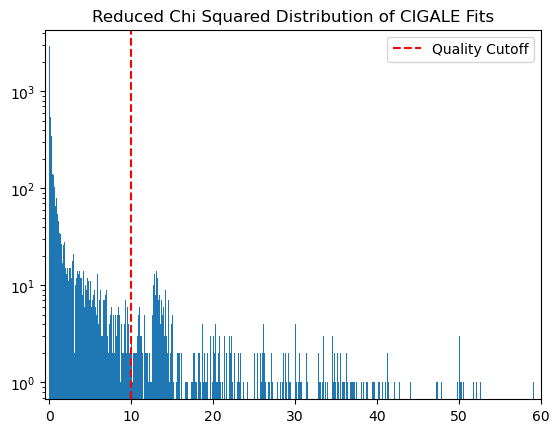

In [14]:
# Plotting a histogram of SED Fit Results
binedges = np.linspace(0,60,601)
plt.hist(resultsdata['best.reduced_chi_square'], bins=binedges)
plt.title('Reduced Chi Squared Distribution of CIGALE Fits')
plt.axvline(x=10, ymin=0, ymax=1, color='red', ls='--', label='Quality Cutoff')
plt.yscale('log')
plt.xlim(-0.5,60)
plt.legend();

In [15]:
# Determing sample size based on chosen quality cut
len(resultsdata['best.reduced_chi_square'][resultsdata['best.reduced_chi_square']<10])

5501

In [16]:
# Comparing to full sample size
len(resultsdata)

5973

In [17]:
# Test: Displaying derived flux in KPNOU filter for a case that didn't have an input flux
resultsdata['best.KPNOU'][100]

0.0004516584456241718

In [18]:
# Test: Displaying input flux for the test case above
observationsdata['KPNOU'][100]

nan